<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #6c584c; text-align: right; ">Created By: Muhammad Faarisul Ilmi</h1>

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #273e47; text-align: center"><b>Customer Segmentation</b><br><span style="color: #bc6c25; font-size: 25px">Analysis of company's ideal customers</span></h1>
<hr>

<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #a4243b; text-align: center; "><b>If you find this notebook useful, give it a thumbs up 😉👍🏻</b></h1>

<h1><b><span style="color: #d8973c; font-size: 28px">TABLE OF CONTENTS</span></b></h1>

* [Problem Statement](#0)
* [Preparation](#1)
* [Data Cleaning](#2)
* [Data Visualization](#3)
* [Data Processing](#4)
* [Clustering](#5)
* [Customer Profiling](#6)
* [Conclusion](#7)

<a id="0"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">PROBLEM STATEMENT</span></b></h1>

![img](https://blog.usetada.com/hubfs/the-value-of-loyal-customer-cover3.jpg)

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

<a id="1"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">PREPARATION</span></b></h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import get_dummies
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_initial = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df_initial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<a id="2"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">DATA CLEANING</span></b></h1>

In [4]:
df_initial['Dt_Customer'] = pd.to_datetime(df_initial['Dt_Customer'])

print("The oldest record on customer's enrollment:", min(df_initial['Dt_Customer']).date())
print("The newest record on customer's enrollment:", max(df_initial['Dt_Customer']).date())

The oldest record on customer's enrollment: 2012-01-08
The newest record on customer's enrollment: 2014-12-06


So, we are going to modify some features as well as create new ones for further analysis and modeling

- **Age**: The age of the customers are the age in 2014 as it's the last record we have (6th Dec 2014) or we can round that up to 2015
- **Education**: Narrowing down to 3 categories
- **Living_With**: Narrowing down to 2 categories
- **Total_Children**: Merging **Kidhome** and **Teenhome** columns into 1 column which describes the number of children living in the household
- **Dt_Customer**: Extracting new features out of dates to make **Day**, **Dayofweek**, **Month**, and **Year** features
- **Is_Parent**: Referring to the parenthood status
- **Total_Spent**: Customer's total spent on products
- Renaming several features for simplicity

In [5]:
df_initial['Age'] = 2015 - df_initial['Year_Birth'] 
df_initial['Education'] = df_initial['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})
df_initial['Living_With'] = df_initial['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Absurd': 'Alone', 'YOLO': 'Alone'})
df_initial['Total_Children'] = df_initial['Kidhome'] + df_initial['Teenhome']

# Breaking down the date of customer's enrollment
df_initial['Day'] = df_initial['Dt_Customer'].apply(lambda x: x.day)
df_initial['Dayofweek'] = df_initial['Dt_Customer'].apply(lambda x: x.day_name())
df_initial['Month'] = df_initial['Dt_Customer'].apply(lambda x: x.month)
df_initial['Year'] = df_initial['Dt_Customer'].apply(lambda x: x.year)

df_initial['Is_Parent'] = df_initial['Total_Children'].apply(lambda x: 1 if x != 0 else 0)
df_initial['Total_Spent'] = df_initial['MntWines'] + df_initial['MntFruits'] + df_initial['MntMeatProducts'] + df_initial['MntFishProducts'] + df_initial['MntSweetProducts'] + df_initial['MntGoldProds']

# Clear description of feature
df_initial.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meats', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Golds'}, inplace=True)
df_initial.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}, inplace=True)

# Drop unnecessary columns and nan values
df_initial.dropna(inplace=True)
df_initial.drop(['ID', 'Dt_Customer', 'Year_Birth', 'Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

df = df_initial.copy()

In [6]:
print('Income:')
print(df['Income'].sort_values().tail(5))

print('\nAge:')
print(df['Age'].sort_values().tail(5))

# Get rid of outliers
df = df.drop(2233)
df = df[df['Age'] < 80]

Income:
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, dtype: float64

Age:
424      74
1950     75
192     115
339     116
239     122
Name: Age, dtype: int64


<a id="3"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">DATA VISUALIZATION</span></b></h1>

In [7]:
sns.color_palette('copper_r')

[(1.0, 0.6709129411764706, 0.42726470588235294),
 (0.8816606922044046, 0.5575623529411765, 0.355078431372549),
 (0.7072662695705663, 0.4472752941176471, 0.28484313725490196),
 (0.5280275574191214, 0.33392470588235296, 0.21265686274509804),
 (0.35363313478528313, 0.2236376470588235, 0.14242156862745098),
 (0.1743944226338383, 0.1102870588235294, 0.07023529411764706)]

Text(0.5, 1.05, 'Feature Relationship')

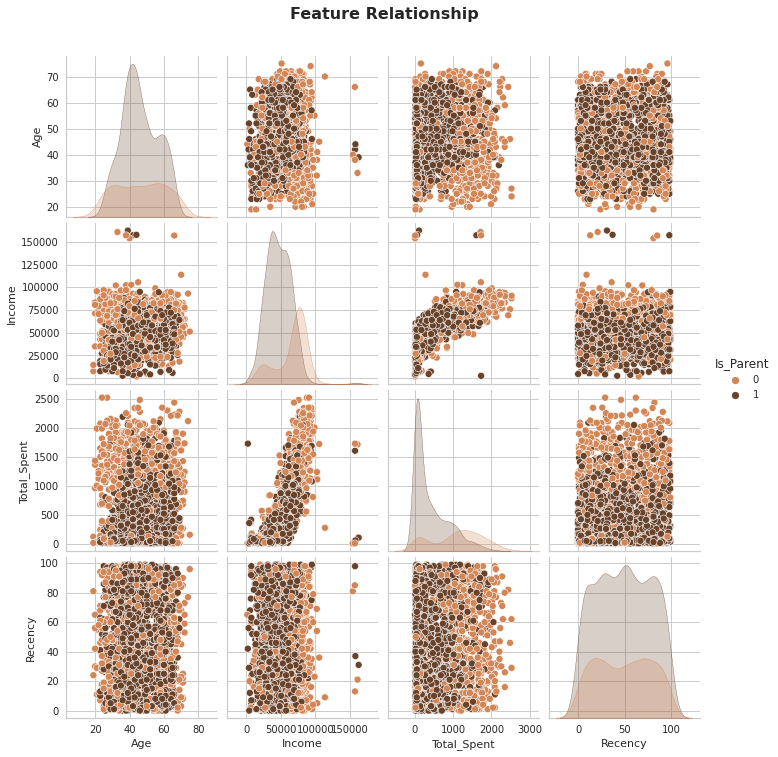

In [8]:
data = ['Age', 'Income', 'Total_Spent', 'Recency', 'Is_Parent']

plot = sns.pairplot(df[data], hue='Is_Parent', palette='copper_r')
plot.fig.suptitle('Feature Relationship', y=1.05, weight='bold', fontsize=16)

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- At a glance, we can see that parents expended less money on products than people who were not a parent yet
- People who had higher income were more likely to expend more on products

<AxesSubplot:xlabel='Year', ylabel='count'>

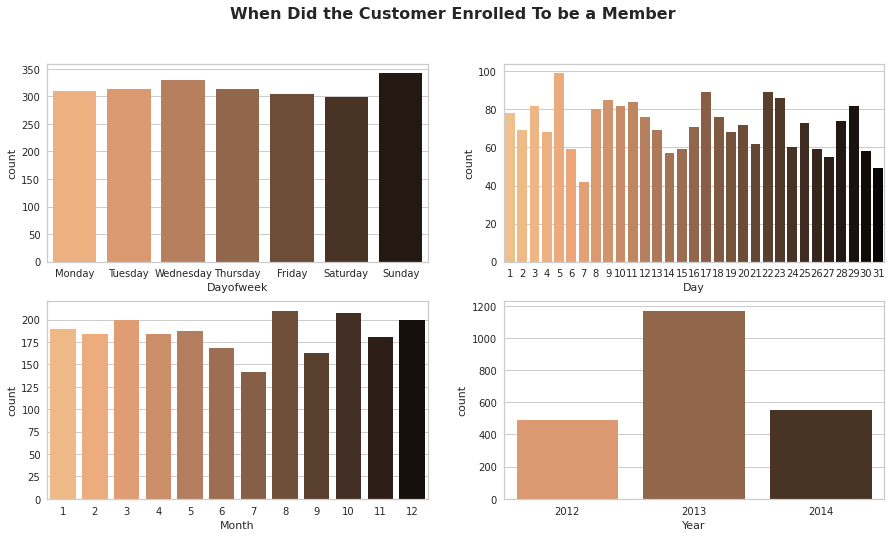

In [9]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
axes = axes.flatten()
fig.suptitle("When Did the Customer Enrolled To be a Member", weight='bold', fontsize=16)

sns.countplot(df['Dayofweek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], palette='copper_r', ax=axes[0])

# mean_day = df['Day'].value_counts().mean()
sns.countplot(df['Day'], palette='copper_r', ax=axes[1])
# axes[1].axhline(mean_day, ls='--', color='r')
# axes[1].text(31, mean_day, 'Mean: {} new members'.format(round(mean_day)), color='red')

sns.countplot(df['Month'], palette='copper_r', ax=axes[2])

sns.countplot(df['Year'], palette='copper_r', ax=axes[3])

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- Majority of customers registered to be a company's member on sunday. It's probably because they had more time on the weekend
- On the other side, most of the customers enrolled on 5th day of each month
- August and october were similar in the number of enrollment with more than 200 people for each month. Also, 2013 yielded the most members simply because it had more data than the rest of the years in this dataset

In [10]:
group = pd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80])
group.value_counts()

(40, 50]    669
(30, 40]    552
(50, 60]    459
(60, 70]    298
(20, 30]    212
(70, 80]     15
(10, 20]      7
Name: Age, dtype: int64

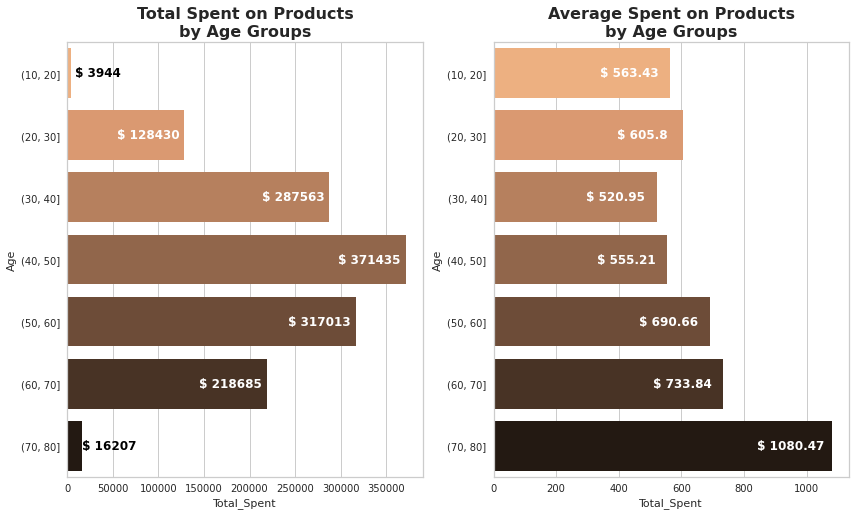

In [11]:
df2 = df.copy()
df2['Age'] = group

sum_group = df2[['Total_Spent', 'Age']].groupby('Age').sum()
mean_group = df2[['Total_Spent', 'Age']].groupby('Age').mean()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes = axes.flatten()

sns.barplot(x=sum_group['Total_Spent'], y=sum_group.index, palette='copper_r', ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['Total_Spent']):
    if i == 0 or i ==6:
        axes[0].text(v+30000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v-40000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)

sns.barplot(x=mean_group['Total_Spent'], y=mean_group.index, palette='copper_r', ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Total_Spent']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- The distribution of the data was not equal for each group. There was only 21 people in total of the first group and the last group. That's why there was a huge contrast on total spent
- Since the number of people in each group was not balanced, we can use average spent. People over 70 years old spent more money on products compared to the rest of the age group with more than 1000 dollars, It's 2 times higher than 30-40 years people did in the same period of time

(0.0, 1.0, 0.0, 1.0)

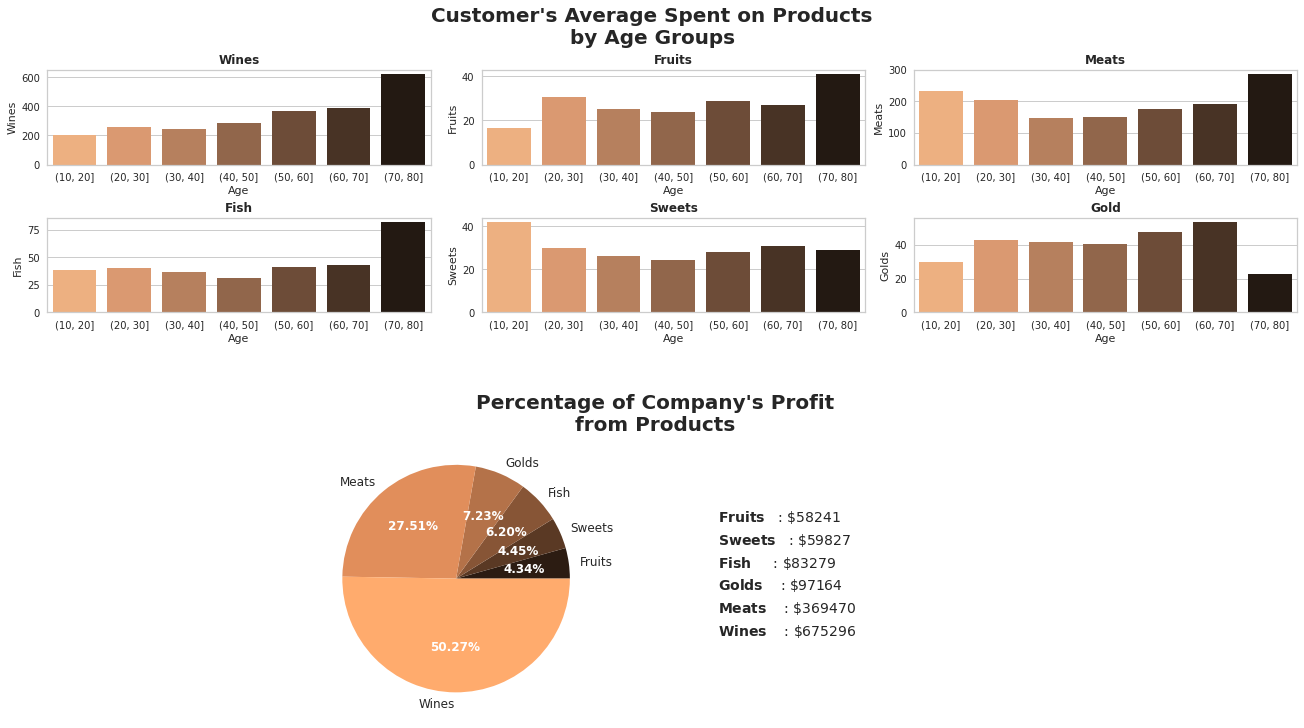

In [12]:
fig, axd = plt.subplot_mosaic([[0,1,2],[3,4,5], [6,6,7], [6,6,7], [6,6,7]],
                              constrained_layout=True, figsize=(18,10))

fig.suptitle("Customer's Average Spent on Products\nby Age Groups", weight='bold', fontsize=20)

# Bar plot
sns.barplot(data=df, x=group, y='Wines', palette='copper_r', ci=None, ax=axd[0])
axd[0].set_title('Wines', weight='bold')
sns.barplot(data=df, x=group, y='Fruits', palette='copper_r', ci=None, ax=axd[1])
axd[1].set_title('Fruits', weight='bold')
sns.barplot(data=df, x=group, y='Meats', palette='copper_r', ci=None, ax=axd[2])
axd[2].set_title('Meats', weight='bold')
sns.barplot(data=df, x=group, y='Fish', palette='copper_r', ci=None, ax=axd[3])
axd[3].set_title('Fish', weight='bold')
sns.barplot(data=df, x=group, y='Sweets', palette='copper_r', ci=None, ax=axd[4])
axd[4].set_title('Sweets', weight='bold')
sns.barplot(data=df, x=group, y='Golds', palette='copper_r', ci=None, ax=axd[5])
axd[5].set_title('Gold', weight='bold')

# Pie chart
data = df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum().sort_values()

palette = sns.color_palette('copper')
wedges, texts, autotexts = axd[6].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[6].set_title("\n\nPercentage of Company's Profit\nfrom Products", weight='bold', fontsize=20, x=1.2)
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[6].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)
    
axd[7].axis('off')

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- All the products were dominated by people over 70 years old except for the sweets and golds
- The oldest group's average spent on wines was incredibly high above 600 dollars
- Wines were the company's best selling product followed by meats, and golds. For wine products only, it yielded more than 675k dollars in a span of 3 years. It's 50.27% of company's income

(0.0, 1.0, 0.0, 1.0)

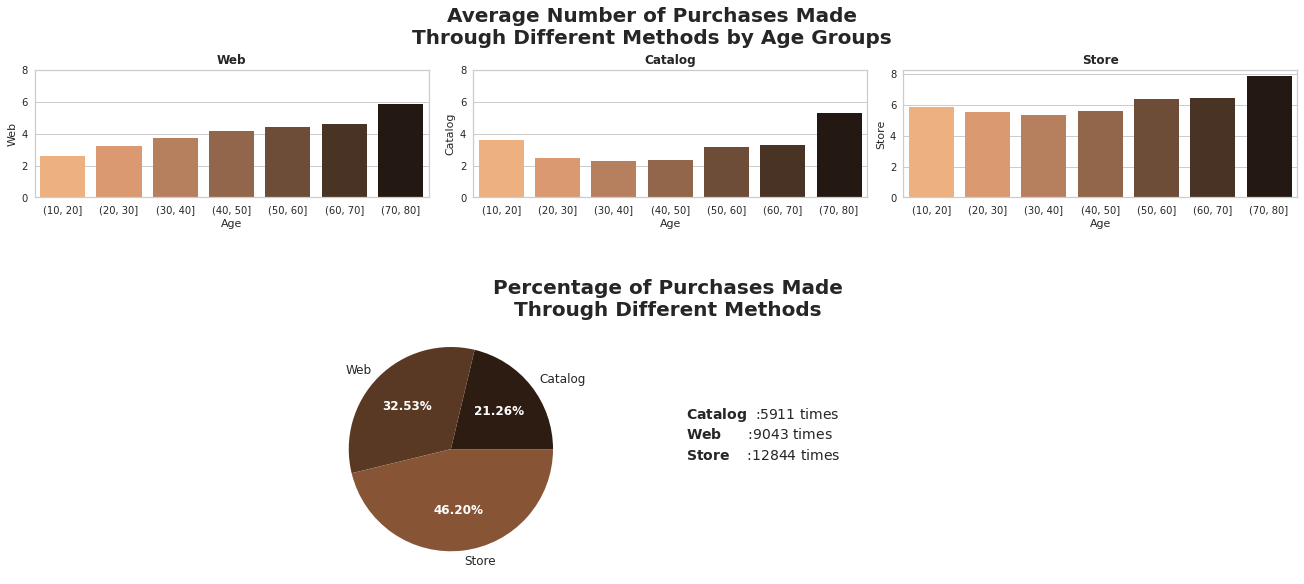

In [13]:
fig, axd = plt.subplot_mosaic([[0,1,2], [3,3,4], [3,3,4]],
                               constrained_layout=True, figsize=(18,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Age Groups", weight='bold', fontsize=20)

custom_ylim = (0, 8)
plt.setp(axd[0], ylim=custom_ylim)
plt.setp(axd[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=df, x=group, y='Web', palette='copper_r', ci=None, ax=axd[0])
axd[0].set_title('Web', weight='bold')
sns.barplot(data=df, x=group, y='Catalog', palette='copper_r', ci=None, ax=axd[1])
axd[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x=group, y='Store', palette='copper_r', ci=None, ax=axd[2])
axd[2].set_title('Store', weight='bold')

# Pie chart
data = df[['Web', 'Catalog', 'Store']].sum().sort_values()

palette = sns.color_palette('copper')
wedges, texts, autotexts = axd[3].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[3].set_title('\n\nPercentage of Purchases Made\nThrough Different Methods', weight='bold', fontsize=20, x=1.35)
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[3].text(2.3, 0.3-0.2*i, r"$\bf{" + name + "}$" + "\t:" + str(value) + " times", fontsize=14)

axd[4].axis('off')

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- Purchases made through web, catalog, and store were also dominated by people over 70 years old even though the number of people in that age group were only 15 (look at the number of people of each group). It's because the number of purchases they made were higher than the rest of age groups
- A large number of successful purchases occurred directly in the store. It accounted for 46.2% of total purchases made to the company

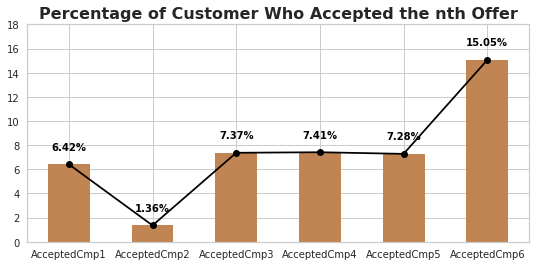

In [14]:
df.rename(columns={'Response':'AcceptedCmp6'}, inplace=True)

plt.figure(figsize=(9,4))
plt.title('Percentage of Customer Who Accepted the nth Offer', weight='bold', fontsize=16)

percent = df.sum()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]*100/len(df)

ax = percent.plot.bar(color='#c08552')
percent.plot(style='o-', colormap='copper')

plt.setp(ax, ylim=(0, 18))

for i,v in enumerate(percent):
    plt.text(i, v+1.2, '{:.2f}%'.format(v), horizontalalignment='center', weight='bold', color='Black', fontsize=10)

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- The percentage of people who directly accepted the offer in the first campaign were just 6.42%. The number became even smaller in the second campaign with just 1.36% of the customers
- The last campaign successfully drew the most customers compared to the previous campaigns with 15.05% percentage of customers.  

<AxesSubplot:title={'center':'Average Number of Purchases Made with a Discount\nby Age Groups'}, xlabel='Age', ylabel='NumDealsPurchases'>

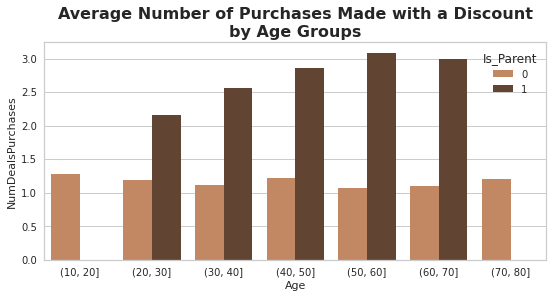

In [15]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Age Groups', weight='bold', fontsize=16)
sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Is_Parent', ci=None, palette='copper_r')

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- Parents were the ones who were attracted more easily by discounts. It's clearly shown on the graph above where in this case the number of purchases made with a discount by parents surpassed non-parents

<AxesSubplot:title={'center':'Feature correlation'}>

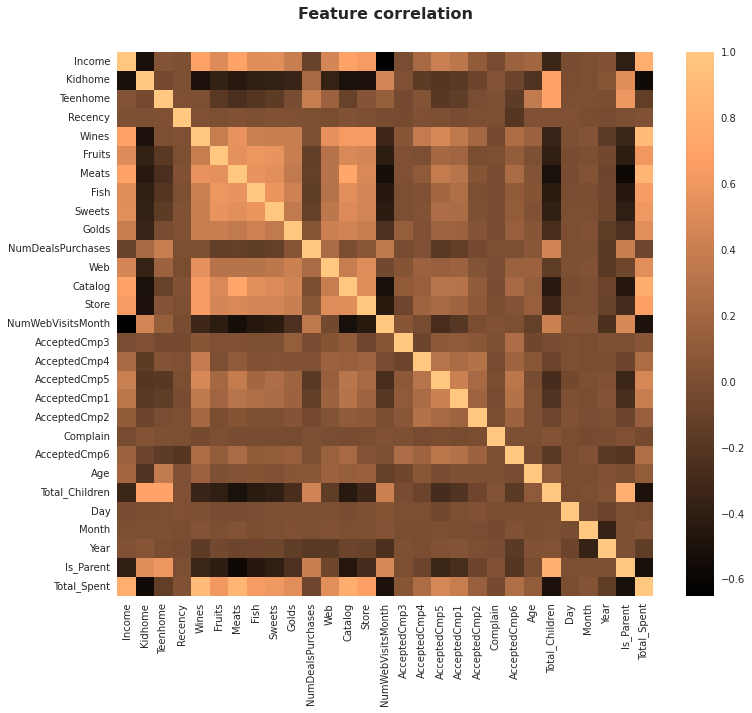

In [16]:
data = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12,10))
plt.title('Feature correlation', weight='bold', fontsize=16, y=1.05)
sns.heatmap(df[data].corr(), cmap='copper')

<h1><b><span style="color: #6c584c; font-size: 16px">Insights from graphs</span></b></h1>

- Apparently, total children and parenthood status have minor correlation on customer's total spent
- As we expected, income and all products are the features that influence total spent the most

<a id="4"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">DATA PROCESSING</span></b></h1>

In [17]:
obj_feat = df.select_dtypes(exclude=[np.number]).columns

dummies = get_dummies(df[obj_feat], drop_first=True)
df_final = pd.concat([df, dummies], axis=1)
df_final.drop(obj_feat, axis=1, inplace=True)
df_final.shape

(2212, 38)

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_final)

df_final_scaled = pd.DataFrame(scaled, columns=df_final.columns)
df_final_scaled.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,...,Total_Spent,Education_Postgraduate,Education_Undergraduate,Living_With_Partner,Dayofweek_Monday,Dayofweek_Saturday,Dayofweek_Sunday,Dayofweek_Thursday,Dayofweek_Tuesday,Dayofweek_Wednesday
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,1.676245,-0.944572,-0.158187,-1.349603,2.481648,-0.395347,-0.427654,-0.406740,-0.40674,-0.417997
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-0.963297,-0.944572,-0.158187,-1.349603,-0.402958,-0.395347,2.338340,-0.406740,-0.40674,-0.417997
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,0.280110,-0.944572,-0.158187,0.740959,-0.402958,-0.395347,-0.427654,-0.406740,-0.40674,2.392364
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.920135,-0.944572,-0.158187,0.740959,-0.402958,-0.395347,-0.427654,2.458574,-0.40674,-0.417997
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-0.307562,1.058681,-0.158187,0.740959,-0.402958,-0.395347,2.338340,-0.406740,-0.40674,-0.417997


In [19]:
# Transform df for the next step which visualizes the data
le = LabelEncoder()

for obj in obj_feat[:-1]:
    trans = le.fit_transform(df[obj])
    df[obj] = trans

<a id="5"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">CLUSTERING</span></b></h1>

Elbow is one of the well-known techniques to determine optimal number of clusters in the data. We will leave the metric distortion as a default which computes the SSE or sum of squared error (distances) from each point to its assigned center using euclidean distance. Altough SSE will decrease as the rise of k, ideally we want a small number of k that still has a small SSE. Therefore, it's just kind of a tradeoff

The k value may vary due to the random initialization of cluster centroids in KMeans Clustering. To make it consistent throughout this notebook, we set a random state to be 123

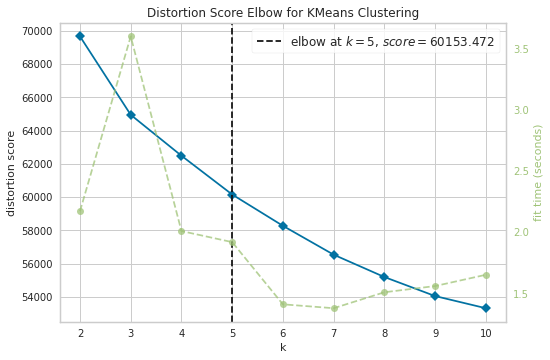

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
elbow = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow.fit(df_final_scaled)
elbow.show()

In [21]:
# Set number of cluster to 5
model = KMeans(n_clusters=5, random_state=123)
yhat = model.fit_predict(df_final_scaled)

df['Cluster'] = yhat

<AxesSubplot:xlabel='Cluster', ylabel='count'>

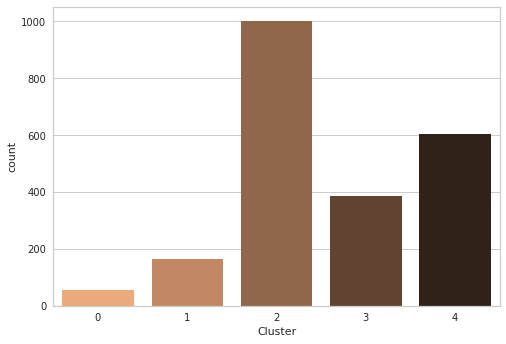

In [22]:
sns.countplot(data=df, x='Cluster', palette='copper_r')

<a id="6"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">CUSTOMER PROFILING</span></b></h1>

<AxesSubplot:label='2', xlabel='Cluster', ylabel='Income'>

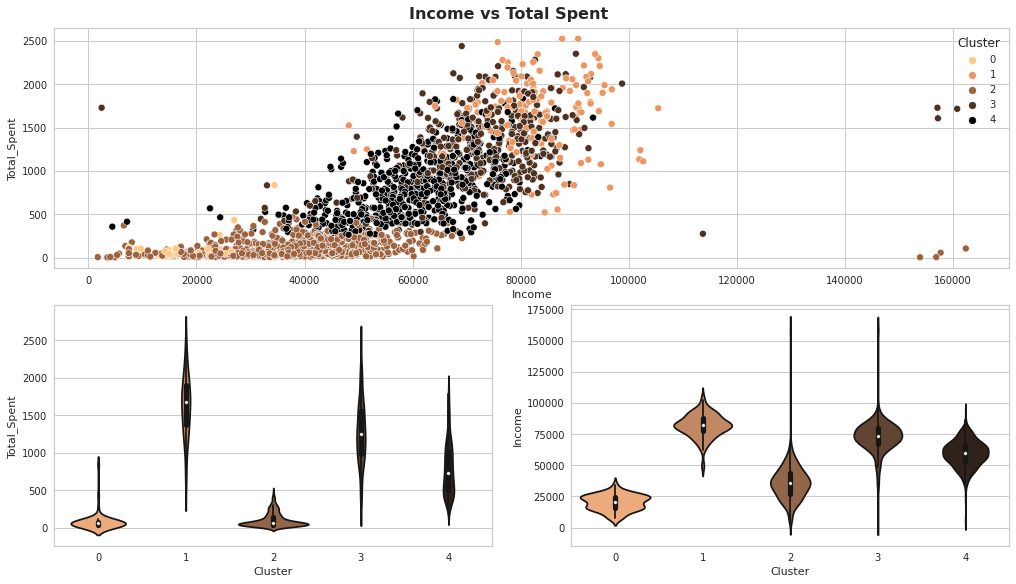

In [23]:
fig, axd = plt.subplot_mosaic([[0,0],[1,2]], constrained_layout=True, figsize=(14,8))
fig.suptitle('Income vs Total Spent', weight='bold', fontsize=16)

sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='Cluster', palette='copper_r', ax=axd[0])
sns.violinplot(data=df, x='Cluster', y='Total_Spent', palette='copper_r', ax=axd[1])
sns.violinplot(data=df, x='Cluster', y='Income', palette='copper_r', ax=axd[2])

<h1><b><span style="color: #6c584c; font-size: 16px">From those graphs, we can deduce that:</span></b></h1>

* **Cluster 0:** Lowest spending & Lowest income
* **Cluster 1:** Highest spending & Highest income
* **Cluster 2:** Low spending & low income
* **Cluster 3:** High spending & High income
* **Cluster 4:** Average spending & Average income

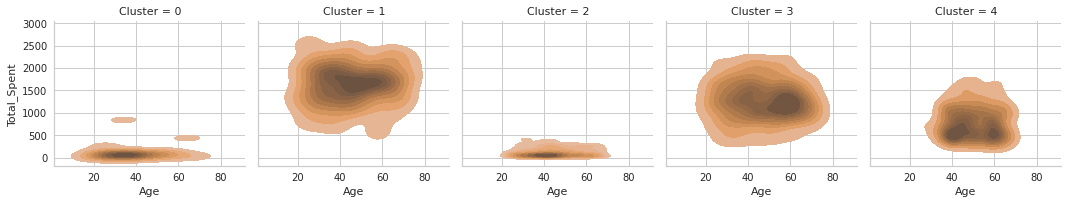

In [64]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Age', 'Total_Spent', color='#c08552', fill=True)

Text(0.6, 3900, '0: Non Parent\n1: Parent')

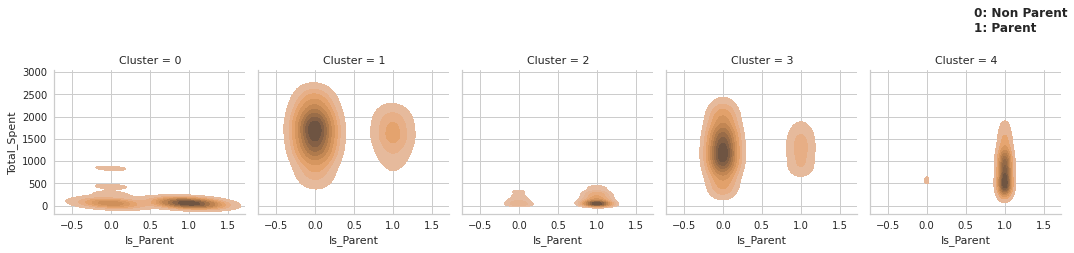

In [51]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Is_Parent', 'Total_Spent', color='#c08552', fill=True)

plt.text(0.6,3900, '0: Non Parent\n1: Parent', weight='bold', fontsize=12)

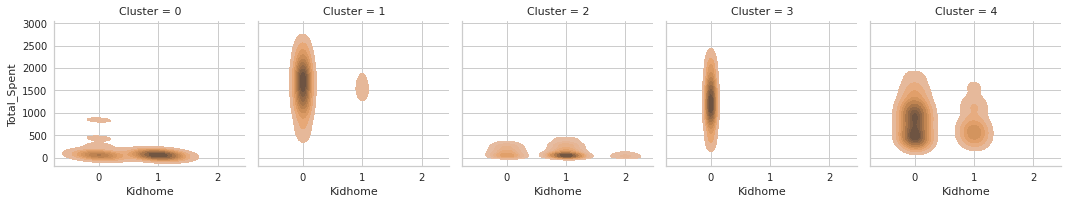

In [53]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Kidhome', 'Total_Spent', color='#c08552', fill=True)

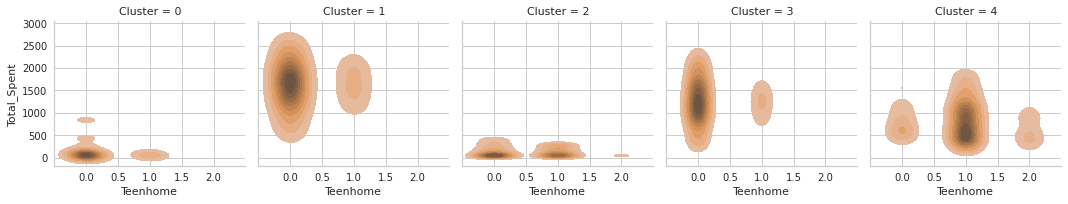

In [54]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Teenhome', 'Total_Spent', color='#c08552', fill=True)

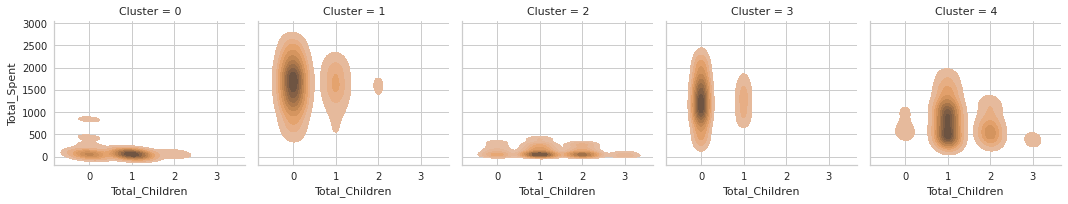

In [55]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Total_Children', 'Total_Spent', color='#c08552', fill=True)

Text(0.7, 3900, '0: Alone\n1: Partner')

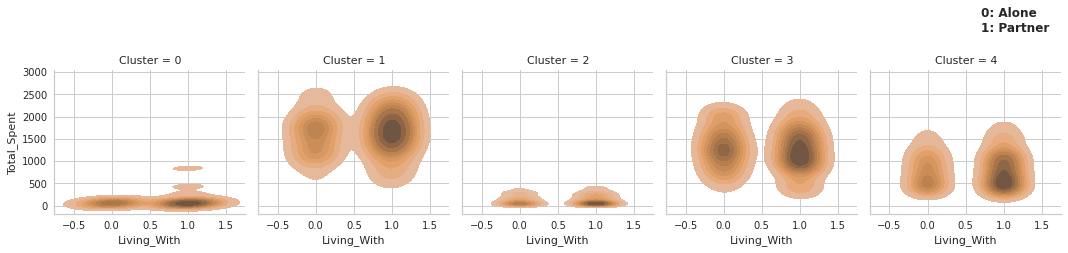

In [56]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Living_With', 'Total_Spent', color='#c08552', fill=True)

plt.text(0.7,3900, '0: Alone\n1: Partner', weight='bold', fontsize=12)

Text(0.6, 3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate')

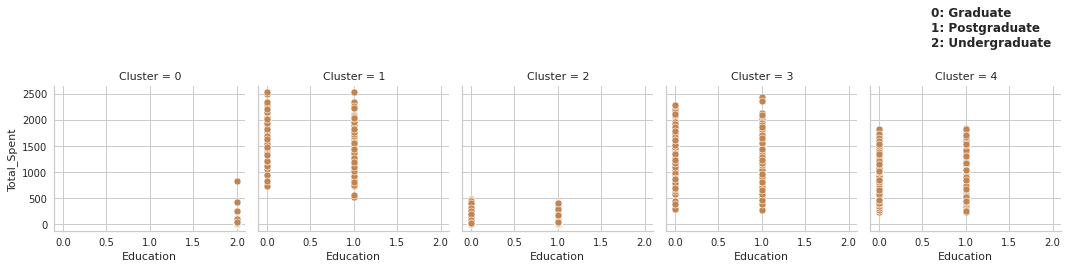

In [30]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.scatterplot, 'Education', 'Total_Spent', color='#c08552')

plt.text(0.6,3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate', weight='bold', fontsize=12)

<AxesSubplot:title={'center':"Average Number of Days Since Customer's Last Purchase\nby Clusters"}, xlabel='Cluster', ylabel='Recency'>

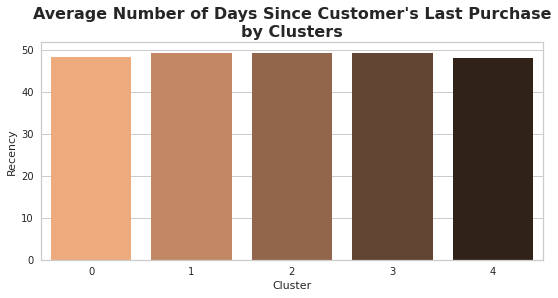

In [31]:
plt.figure(figsize=(9,4))
plt.title("Average Number of Days Since Customer's Last Purchase\nby Clusters", weight='bold', fontsize=16)
sns.barplot(data=df, x='Cluster', y='Recency', palette='copper_r', ci=None)

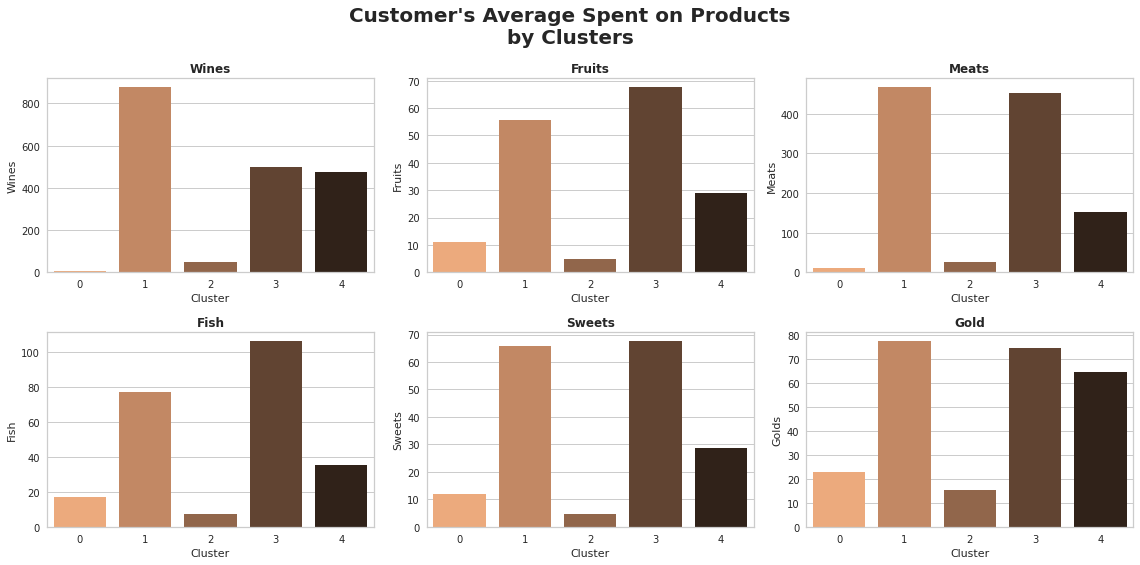

In [32]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Customer's Average Spent on Products\nby Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=df, x='Cluster', y='Wines', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Wines', weight='bold')
sns.barplot(data=df, x='Cluster', y='Fruits', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Fruits', weight='bold')
sns.barplot(data=df, x='Cluster', y='Meats', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Meats', weight='bold')
sns.barplot(data=df, x='Cluster', y='Fish', palette='copper_r', ci=None, ax=axes[3])
axes[3].set_title('Fish', weight='bold')
sns.barplot(data=df, x='Cluster', y='Sweets', palette='copper_r', ci=None, ax=axes[4])
axes[4].set_title('Sweets', weight='bold')
sns.barplot(data=df, x='Cluster', y='Golds', palette='copper_r', ci=None, ax=axes[5])
axes[5].set_title('Gold', weight='bold')

plt.tight_layout()

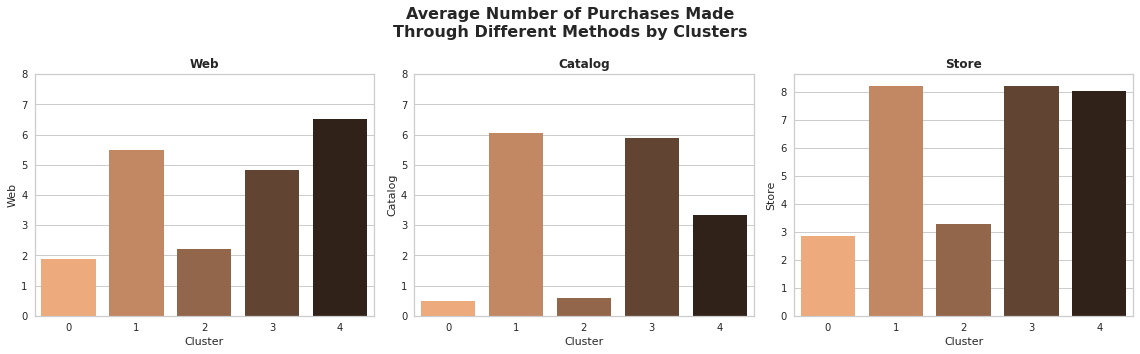

In [33]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=16)
axes = axes.flatten()

custom_ylim = (0, 8)
plt.setp(axes[0], ylim=custom_ylim)
plt.setp(axes[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=df, x='Cluster', y='Web', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Web', weight='bold')
sns.barplot(data=df, x='Cluster', y='Catalog', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x='Cluster', y='Store', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Store', weight='bold')

plt.tight_layout()

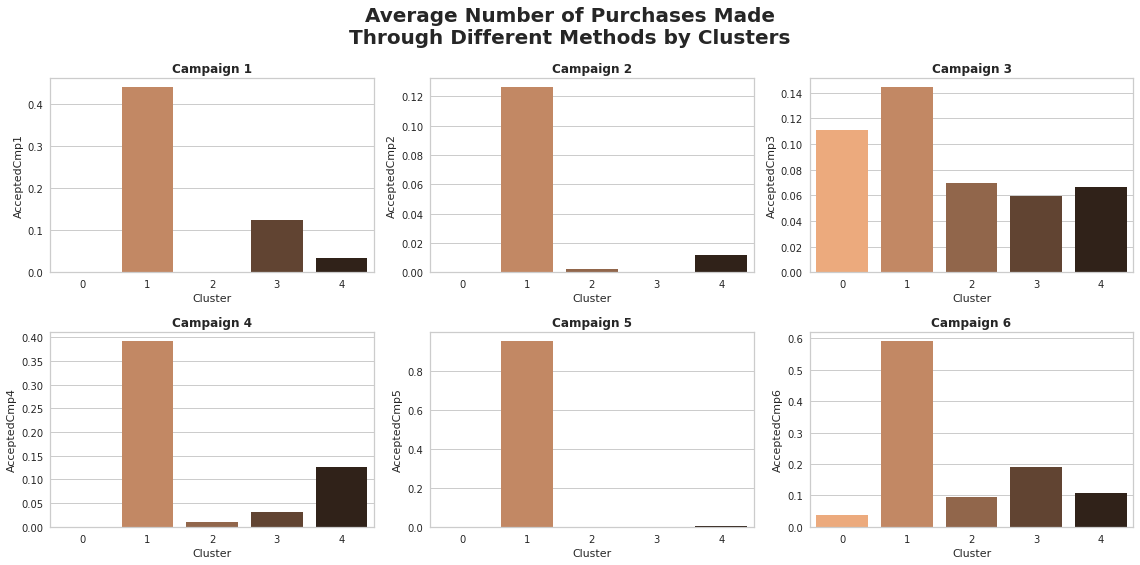

In [34]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=df, x='Cluster', y='AcceptedCmp1', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Campaign 1', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp2', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Campaign 2', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp3', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Campaign 3', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp4', palette='copper_r', ci=None, ax=axes[3])
axes[3].set_title('Campaign 4', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp5', palette='copper_r', ci=None, ax=axes[4])
axes[4].set_title('Campaign 5', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp6', palette='copper_r', ci=None, ax=axes[5])
axes[5].set_title('Campaign 6', weight='bold')

plt.tight_layout()

<AxesSubplot:title={'center':'Average Number of Purchases Made with a Discount\nby Clusters'}, xlabel='Cluster', ylabel='NumDealsPurchases'>

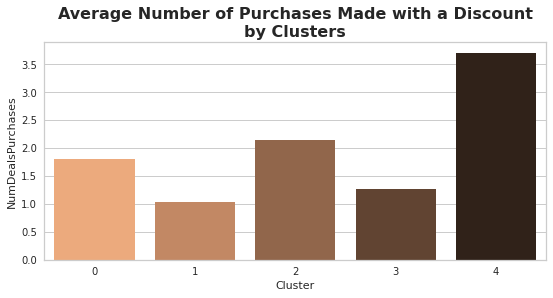

In [35]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Clusters', weight='bold', fontsize=16)
sns.barplot(data=df, x='Cluster', y='NumDealsPurchases', ci=None, palette='copper_r')

We have come to an end of this notebook. After extracting insights and information from clustering result and performing some analyses

Here's the conclusion of each cluster:

**Cluster 0:**
- Relatively younger
- Have a max 2 children, dominated by kids
- Undergraduate students or those who don't pursue a bachelor degree

**Cluster 1:**
- Span all ages
- A large number of them are not a parent
- Actively participated in all 6 campaigns

**Cluster 2:**
- Span all ages
- Majority of them are a parent
- Have a max 3 children

**Cluster 3:**
- Span all ages
- Most of them are not a parent
- For those who are a parent, they have 1 teenager at home

**Cluster 4:**
- Relatively older
- Almost all of them are a parent, except a very few number of people
- Have a max 3 children, dominated by teenagers
- High participation in discount products

<a id="7"></a>
<h1><b><span style="color: #d8973c; font-size: 28px">CONCLUSION</span></b></h1>

![img](https://www.relevantinsights.com/wp-content/uploads/2021/11/Market-Segmentation.jpg)

This work emphasizes on how to perform customer segmentation or customer personality using unsupervised learning to gain an understanding about our overall customer. This kind of analysis is remarkably useful to determine which one is our priority customer and which one needs a different treatment in order to be one of our loyal customer

<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #a4243b; text-align: center; "><b>If you find this notebook useful, give it a thumbs up 😉👍🏻</b></h1>

<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #bc6c25; text-align: center; "><b>Let me know in the comment if there is a feedback for this notebook</b></h1>

<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #bc6c25; text-align: center; "><b>THANK YOU</b></h1>

<h1 style="font-family: Trebuchet MS; font-size: 48px; color: #273e47; text-align: center; "><b>THE END</b></h1>

<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #6c584c; text-align: right; ">Created By: Muhammad Faarisul Ilmi</h1>